In [1]:
# %pip install tensorflow
# %pip install --upgrade tensorflow keras tf2onnx


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# ---------------- LOAD DATA ----------------
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test  = np.loadtxt('input_test.csv', delimiter=',')
Y_test  = np.loadtxt('labels_test.csv', delimiter=',')

In [8]:
# ---------------- RESHAPE DATA ----------------
X_train = X_train.reshape(-1, 100, 100, 3).astype('float32')
X_test  = X_test.reshape(-1, 100, 100, 3).astype('float32')

Y_train = Y_train.reshape(-1,)   # make labels 1D
Y_test  = Y_test.reshape(-1,)
# ---------------- NORMALIZE ----------------
X_train /= 255.0
X_test  /= 255.0

print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)


shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000,)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400,)


In [9]:
# ---------------- DATA AUGMENTATION ----------------
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

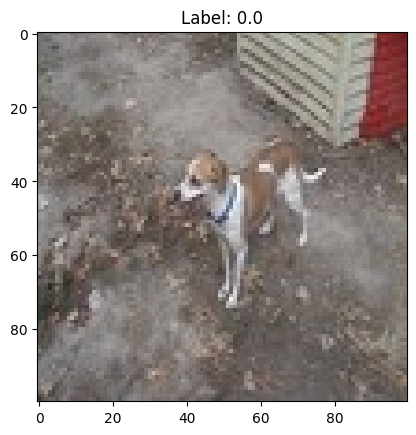

In [10]:
# ---------------- VISUALIZE SAMPLE ----------------
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx])
plt.title(f"Label: {Y_train[idx]}")
plt.show()

In [11]:
# ---------------- MODEL ----------------
model = Sequential([
    Input(shape=(100, 100, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
%pip install scipy

   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------- ----------------------------- 10.0/36.3 MB 64.0 MB/s eta 0:00:01
   ---------------------------- ----------- 25.4/36.3 MB 70.4 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.3 MB 67.1 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 58.6 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# ---------------- TRAIN ----------------
model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, Y_test),
    verbose=1
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.5025 - loss: 0.7569 - val_accuracy: 0.5025 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.5605 - loss: 0.6878 - val_accuracy: 0.5975 - val_loss: 0.6803
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5855 - loss: 0.6794 - val_accuracy: 0.6700 - val_loss: 0.6472
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.6070 - loss: 0.6630 - val_accuracy: 0.6150 - val_loss: 0.6619
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.6070 - loss: 0.6686 - val_accuracy: 0.6475 - val_loss: 0.6503
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.6375 - loss: 0.6547 - val_accuracy: 0.6525 - val_loss: 0.6294
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6350 - loss: 0.6385 - val_accuracy: 0.6475 - val_loss: 0.6331
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6330 - loss: 0.6409 - val_accuracy: 

In [16]:
# ---------------- EVALUATE ----------------
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7475 - loss: 0.5213


[0.5213265419006348, 0.7475000023841858]

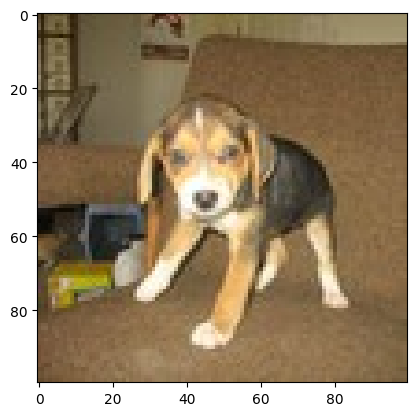

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Model prediction: dog


In [17]:
# ---------------- TEST RANDOM IMAGE ----------------
idx2 = random.randint(0, len(X_test) - 1)
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))[0][0]

pred = "dog" if y_pred < 0.5 else "cat"
print("Model prediction:", pred)

In [18]:
# ---------------- SAVE MODEL ----------------
model.save('model.h5')
print("Model saved successfully.")

Model saved successfully.
